In [2]:
import nltk
from os import getcwd
import pandas as pd
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0,'./utils')
from utils import process_tweet, build_freqs

In [3]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = all_positive_tweets + all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets), 1)), np.zeros((len(all_negative_tweets),1)), axis = 0)
train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]
train_x = train_pos + train_neg
print("Number of tweets: ", len(train_x))


Number of tweets:  8000


In [4]:
data = pd.read_csv('data/logistic_features.csv')
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [5]:
X = data[['bias', 'positive', 'negative']].values
Y = data['sentiment'].values

print(X.shape)
print(X)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [6]:
theta = [7e-08, 0.0005239, -0.00055517]

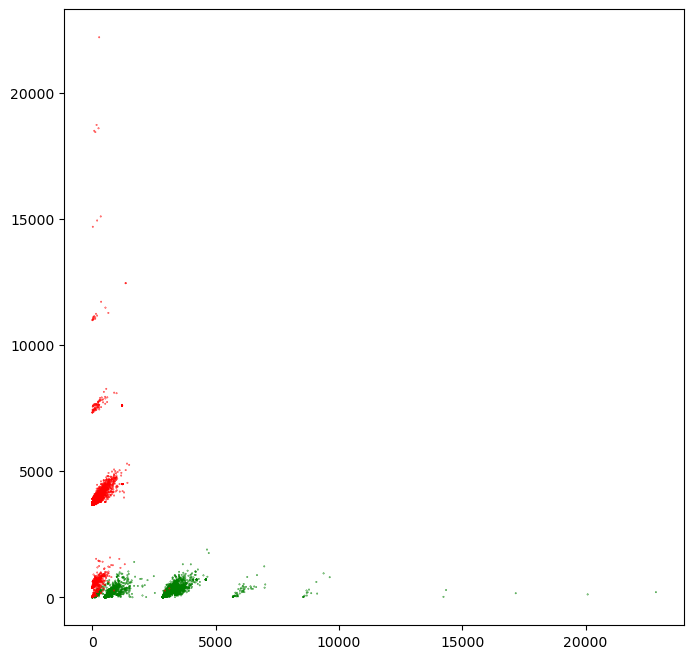

In [10]:
fig, ax = plt.subplots(figsize = (8,8))
colors = ['red','green']
ax.scatter(X[:,1], X[:,2], c = [colors[int(k)] for k in Y], s = 0.1)
plt.xlabel="Positive"
plt.ylabel="Negative"

In [12]:
def neg(theta, pos):
    return(-theta[0] - pos * theta[1]) / theta[2]

def direction(theta, pos):
    return pos * theta[2] / theta[1]

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))

colors = ['red', 'green']